In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import time as dt
from sklearn.linear_model import LinearRegression
import warnings
from pandas.errors import SettingWithCopyWarning
import statsmodels.api as sm

class Model(object):
    """Модель линейной регрессии"""
    def __init__(self, shape):
        """Initialize Model

        Args:
            shape (tuple-like): shape of X dataset
        """
        
        self.shape = shape
        self.b = np.zeros([self.shape[1] + 1, 1])
        self.x0 = pd.DataFrame({'x0': np.ones(self.shape[0])})
        
    def predict(self, X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        
        return X @ self.b
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
            
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))
    
    def fit(self, X, Y, alpha=0.01, accuracy=0.01, max_steps=10000):
        start_time = dt.time()
        x_all = pd.concat([self.x0, X], axis=1)
        self.x_all = x_all
        steps, errors = [], []
        step = 0
        for _ in range(1000):
            dJ_b = -1/self.shape[0] * x_all.T @ (Y - self.predict(x_all))
            self.b -= alpha * dJ_b
            new_err = self.error(Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        self.errors=errors
        self.steps=steps
        
        stop_time=dt.time()
        self.study_time_seconds = stop_time-start_time
        
        return steps, errors, self.b
    
    
    def plot(self, Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all

        yy=self.predict()
        plt.scatter(yy,Y)
        plt.plot(yy,yy,c='r')
        plt.show()
    
    def study_plot(self):
        plt.plot(self.steps,self.errors)
        plt.show
    
    def score(self, Y,X=pd.DataFrame() ):
        y_pred = self.predict()
        ss_res = np.sum((Y - y_pred)**2)
        ss_total = np.sum((Y - np.mean(Y))**2)
        r2 = 1 - (ss_res / ss_total)
        return r2

    def MSE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MSE = (1/Y_pred.shape[0]) * np.sum((Y_pred - Y)**2)
        return MSE

    def RMSE(self, Y,X=pd.DataFrame() ):
        return np.sqrt(self.MSE(Y))

    def MAE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAE = (1/Y_pred.shape[0]) * np.sum(abs(Y_pred - Y))
        return MAE

    def MAPE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAPE = (1/Y_pred.shape[0]) * np.sum(abs(Y_pred - Y)/Y)*100
        return MAPE
    
    def show_metrics(self, y,X=pd.DataFrame() ):
        text=f'''
Error after gradient descent = {self.error(y).iloc[0,0]}
Mean Absolute Percentage Error = {round(self.MAPE(y)[0],2)}%
R2 Score = {round(self.score(y)[0],4)}
Root of Mean Squared Error = {round(self.RMSE(y)[0],2)}
Mean Squared Error = {round(self.MSE(y)[0],2)}
Mean Absolute Error = {round(self.MAE(y)[0],2)}
Study Time = {self.study_time_seconds*1000} ms
        '''
        print(text)
    
    def complex_out(self,x,y):
        self.fit(x, y)
        self.plot(y)
        self.study_plot()
        self.show_metrics(y)

In [230]:
name='Семинар парная нелинейная регрессиия.xlsx'


data=pd.read_excel(name,header=0, usecols=[0,1])
data

,X,Y
0,3,7
1,7,19
2,7,15
3,10,22
4,12,21
5,14,31
6,17,26
7,20,33
8,21,26
9,22,27


# 1

In [231]:
data['1/X']=1/data['X']
data['lnX'] = np.log(data['X'])
data['lnY'] = np.log(data['Y'])

In [232]:
md1 = LinearRegression()
md1.fit(data[['1/X']], data['Y'])
md1.score(data[['1/X']], data['Y'])

xx1 = np.linspace(data.X.min(), data.X.max(), 100)
yy1 = md1.predict((1/xx1).reshape(-1, 1))

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2

In [233]:
md2 = LinearRegression()
md2.fit(data[['lnX']], data['lnY'])
md2.score(data[['lnX']], data['lnY'])

xx2 = np.linspace(data.X.min(), data.X.max(), 100)
yy2 = np.exp(md2.predict(np.log(xx2).reshape(-1, 1)))

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [234]:
np.exp(md2.intercept_), md2.coef_[0]

(4.180414894944696, 0.6633057496772065)

# 3

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


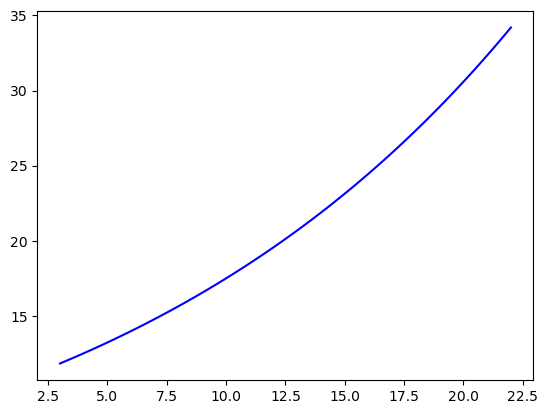

In [240]:
md3 = LinearRegression()
md3.fit(data[['X']], data['lnY'])
md3.score(data[['X']], data['lnY'])

xx3 = np.linspace(data.X.min(), data.X.max(), 100)
yy3 = np.exp(md3.predict(xx3.reshape(-1, 1)))
plt.plot(xx3, yy3 , c='blue')

# 4

In [236]:
md4 = LinearRegression()
md4.fit(data[['X']], data['lnY'])
md4.score(data[['X']], data['lnY'])

xx4 = np.linspace(data.X.min(), data.X.max(), 100)
yy4 = np.exp(md4.predict(xx4.reshape(-1, 1)))

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 5 (С доски)

$$
y = \beta e^{\gamma t} +\epsilon\\
ln y = ln \beta + \gamma t
$$

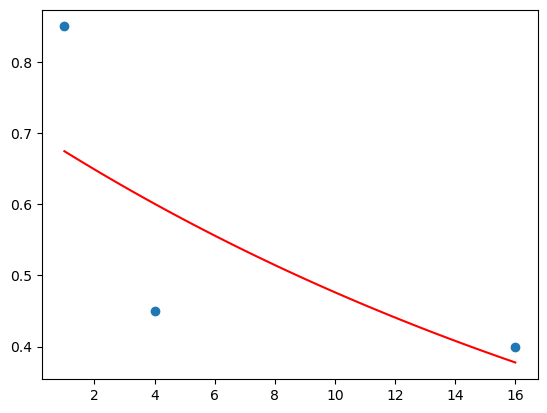

0.57380691497252

(0.7012543078038006, array([-0.03869825]))

In [260]:
t=np.array([1,4,16]).reshape(-1, 1)
y=np.array([0.85,0.45,0.4])
md5 = LinearRegression()
md5.fit(t,np.log(y))

xx5= np.linspace(min(t), max(t), 100)
yy5 = np.exp(md5.predict(xx5))

plt.scatter(t, y)
plt.plot(xx5, yy5, c='r')
plt.show()
display(md5.score(t,np.log(y)))
np.exp(md5.intercept_),md5.coef_

# All in all

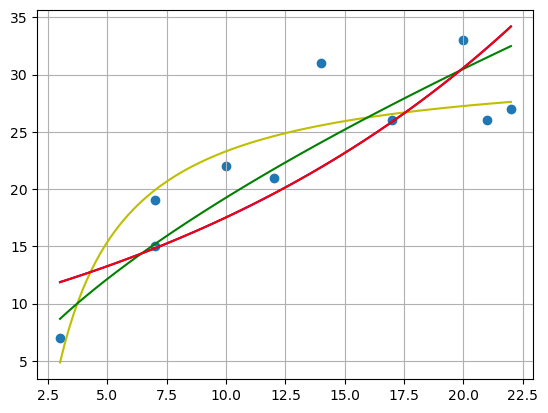

In [262]:
plt.scatter(data[['X']], data[['Y']])
plt.plot(xx1, yy1 , c='y')
plt.plot(xx2, yy2 , c='g')
plt.plot(xx3, yy3 , c='b')
plt.plot(xx4, yy4 , c='r')
plt.grid()
plt.show()

In [269]:

name='Данные Филлипс.xlsx'


data=pd.read_excel(name,header=0, usecols=[1,2])
data['X']=data['Уровень безработиц, %']
data['Y']=data['Зарплата, у.е.']
data

,"Уровень безработиц, %","Зарплата, у.е.",X,Y
0,1.00,1.61,1.00,1.61
1,1.38,1.66,1.38,1.66
2,1.15,1.80,1.15,1.80
3,1.50,1.95,1.50,1.95
4,1.55,2.05,1.55,2.05
5,1.20,2.12,1.20,2.12
6,1.10,2.25,1.10,2.25
7,1.00,2.45,1.00,2.45
8,1.35,2.55,1.35,2.55
9,1.80,2.67,1.80,2.67


In [270]:
data['1/X']=1/data['X']

In [274]:
md1 = LinearRegression()
md1.fit(data[['1/X']], data['Y'])
md1.score(data[['1/X']], data['Y'])

xx1 = np.linspace(data.X.min(), data.X.max(), 100)
yy1 = md1.predict((1/xx1).reshape(-1, 1))
md1.intercept_,md1.coef_

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(3.8663734626976805, array([-1.67267646]))

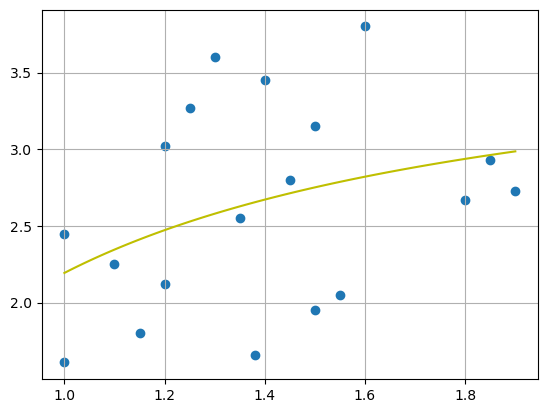

In [272]:
plt.scatter(data[['X']], data[['Y']])
plt.plot(xx1, yy1 , c='y')
plt.grid()
plt.show()